# TF-IDF models

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle


df = pd.read_csv('../FINAL_GEMINI_CHATGPT_FULL_fixed_20250529_185657.csv')
df_advers = pd.read_csv('../FINAL_GEMINI_CHATGPT_ADVERS_fixed_20250529_185904.csv')
# df = pd.read_csv('../generation/gemini/non_ai_doctorat_FINAL_GEMINI_23900_24400_final_20250520_212903.csv')
print(len(df))


50000


In [21]:
df_clean = df.dropna(subset=['generated']).copy() 

# Ensure 'chapter' and 'generated' are strings
df_clean['chapter'] = df_clean['chapter'].astype(str)
df_clean['generated'] = df_clean['generated'].astype(str)

In [22]:
test_size = 0.2

unique_ids = set(df_clean['document_id'])

print(f'Unique docs:{len(unique_ids)}')

num_docs = int(len(unique_ids) * 0.2)

unique_ids_list = list(unique_ids)
np.random.seed(42)
np.random.shuffle(unique_ids_list)

test_ids = unique_ids_list[:num_docs]

# Create test set by filtering documents with selected IDs
val_df = df_clean[df_clean['document_id'].isin(test_ids)].copy()

# Create training set with remaining documents
train_df = df_clean[~df_clean['document_id'].isin(test_ids)].copy()

print(f"Test set size: {len(val_df)}")
print(f"Training set size: {len(train_df)}")


Unique docs:3254
Test set size: 9917
Training set size: 40083


In [23]:
# Create lists of texts and corresponding labels
train_texts = train_df['chapter'].tolist() + train_df['generated'].tolist()
train_labels = [0] * len(train_df) + [1] * len(train_df)

val_texts = val_df['chapter'].tolist() + val_df['generated'].tolist()
val_labels = [0] * len(val_df) + [1] * len(val_df)

In [24]:
print(len(train_texts))
print(len(val_texts))
print(len(train_labels))
print(len(val_labels))


80166
19834
80166
19834


In [25]:
# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Transform the text data
X_train_tfidf = tfidf_vectorizer.fit_transform(train_texts)
X_val_tfidf = tfidf_vectorizer.transform(val_texts)

## Logistic Regression 

In [26]:
# Train a logistic regression model
tfidf_model = LogisticRegression()

# Fit the model
tfidf_model.fit(X_train_tfidf, train_labels)

# Make predictions
train_predictions = tfidf_model.predict(X_train_tfidf)
val_predictions = tfidf_model.predict(X_val_tfidf)


## Random Forest 

In [28]:
# Train a random forest model
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(
    random_state=42,
    verbose=1,
    n_jobs=6
)

rf_model.fit(X_train_tfidf, train_labels)


[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:  2.7min finished


RandomForestClassifier(n_jobs=6, random_state=42, verbose=1)

In [29]:

# Make predictions
# train_predictions = rf_model.predict(X_train_tfidf)
val_predictions = rf_model.predict(X_val_tfidf)

[Parallel(n_jobs=6)]: Using backend ThreadingBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:    0.8s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:    2.1s finished


## eval preds

In [27]:
# Calculate accuracy
train_accuracy = accuracy_score(train_labels, train_predictions)
val_accuracy = accuracy_score(val_labels, val_predictions)
val_f1_score = f1_score(val_labels, val_predictions)

print(f"\nTraining Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"f1 score: {val_f1_score:.4f}")

# Print classification report
print("\nClassification Report for Validation Set:")
print(classification_report(val_labels, val_predictions))



Training Accuracy: 0.9680
Validation Accuracy: 0.9601
f1 score: 0.9594

Classification Report for Validation Set:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      9917
           1       0.98      0.94      0.96      9917

    accuracy                           0.96     19834
   macro avg       0.96      0.96      0.96     19834
weighted avg       0.96      0.96      0.96     19834



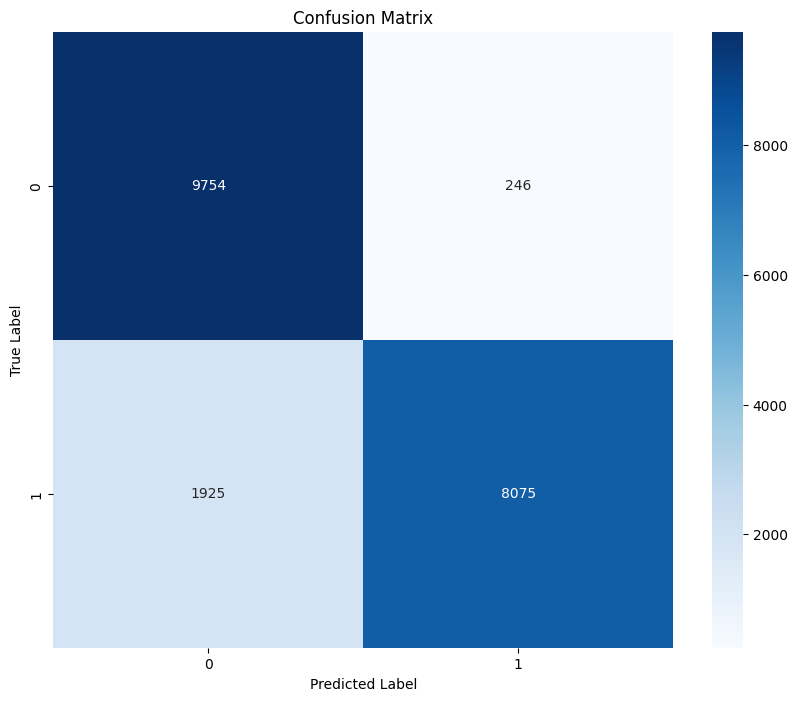

[[9754  246]
 [1925 8075]]


In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


cm = confusion_matrix(val_labels, val_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print(cm)

In [59]:

# Get feature importance
feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = tfidf_model.coef_[0]

# Get top features for each class
n_top_features = 30
top_indices = coefficients.argsort()[-n_top_features:][::-1]
bottom_indices = coefficients.argsort()[:n_top_features]

print("\nTop features for AI-generated text:")
for idx in top_indices:
    print(f"{feature_names[idx]}: {coefficients[idx]:.4f}")

print("\nTop features for original text:")
for idx in bottom_indices:
    print(f"{feature_names[idx]}: {coefficients[idx]:.4f}")



Top features for AI-generated text:
precum: 18.9624
această: 13.8976
adesea: 11.8520
deși: 10.4506
conform: 9.1909
aceste: 8.4659
diverse: 8.3938
esențial: 8.2154
subliniază: 8.1473
fiind: 7.7753
indică: 7.5503
special: 6.8359
devine: 6.7603
esențială: 6.7080
crucial: 6.5504
pentru: 6.3983
ci: 6.2362
semnificativ: 6.2226
esențiale: 6.1280
include: 5.9648
contribuind: 5.9438
acestor: 5.7167
contribuie: 5.3699
ulterior: 5.3562
indicând: 5.3473
contextul: 5.3432
includ: 5.2139
unde: 5.0490
sa: 4.8786
implică: 4.8556

Top features for original text:
care: -15.4566
este: -11.6478
respectiv: -10.1900
sunt: -8.1751
numai: -7.6742
de: -7.5843
multe: -7.4971
foarte: -7.4753
etc: -7.3452
privire: -6.8455
anul: -6.7006
in: -6.5959
si: -6.4155
faptul: -6.1965
dar: -6.0604
diferite: -6.0422
vederea: -5.8472
acestora: -5.7582
din: -5.6785
se: -5.6638
la: -5.4481
ca: -5.3313
cu: -5.3247
anume: -5.2448
au: -5.2252
al: -5.2176
ȋn: -5.1921
mult: -5.1702
urma: -5.0630
ei: -5.0424


### Data ratio plot

In [ ]:
# use only x% of training data
percents = [i for i in range(5, 100, 5)]
accuracies = []
for percent in percents:
    x = percent/100
    print(x)
    train_texts_test = train_texts[:int(len(train_texts) * x)]
    train_labels_test = train_labels[:int(len(train_labels) * x)]
    
    # Create TF-IDF vectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Transform the text data
    X_train_tfidf = tfidf_vectorizer.fit_transform(train_texts_test)
    X_val_tfidf = tfidf_vectorizer.transform(val_texts)
    
    
    # Train a logistic regression model
    tfidf_model = LogisticRegression()

    # Fit the model
    tfidf_model.fit(X_train_tfidf, train_labels_test)

    val_predictions = tfidf_model.predict(X_val_tfidf)
    
    val_accuracy = accuracy_score(val_labels, val_predictions)
    accuracies.append(val_accuracy)

print(accuracies)
plt.plot(percents, accuracies, marker='o', linestyle='-', linewidth=2)
plt.xlabel('Percentage of training data')
plt.ylabel('Accuracy')
plt.title('Accuracy of TF-IDF model with different percentages of training data')
plt.show()

### Single prediction

In [51]:

import random


def predict_text(text):
    """
    Predict whether a given text is AI-generated or original.
    
    Args:
        text (str): The text to classify
        
    Returns:
        tuple: (prediction, probabilities)
            - prediction: 0 for original, 1 for AI-generated
            - probabilities: array of probabilities for each class
    """
    # Transform the text
    text_tfidf = tfidf_vectorizer.transform([text])
    # Get prediction
    prediction = tfidf_model.predict(text_tfidf)[0]
    # Get probability scores
    probabilities = tfidf_model.predict_proba(text_tfidf)[0]
    return prediction, probabilities

# Example prediction
if len(val_texts) > 0:
    example_text = val_texts[random.randint(0, len(val_texts) - 1)]
    prediction, probabilities = predict_text(example_text)
    print(f"\nExample prediction:")
    print(f"Text: {example_text}")
    print(f"Predicted class: {'AI-generated' if prediction == 1 else 'Original'}")
    print(f"Real class: {'AI-generated' if val_labels[val_texts.index(example_text)] == 1 else 'Original'}")
    print(f"Confidence: {probabilities[prediction]*100:.2f}%")


(0, array([0.85327957, 0.14672043]))
Predicted class: Original


In [57]:

text_test='''
Ca și în cazul clasicilor, romanticii își vor îndrepta atenția spre cultura și spațiul elen, însă într-o manieră fundamental diferită. Ei vor fi atrași de orfism, de eleatism, de miturile individualității, de ruinele antice, de soarele și peisajele mediteraneene, de culorile vibrante și căldura Orientului. Această tendință de evaziune spre spațiul exotic va atinge punctul culminant la sfârșitul secolului al XIX-lea și începutul secolului al XX-lea, când simbolistul, nemulțumit de realitatea contingentă, va aspira spre alte lumi, prin visare și prin proiecția dorinței în imaginar.

O dezvoltare amplă a temei visului o regăsim în "Fiica haosului" de Duiliu Zamfirescu, o creație ce poate fi interpretată ca un „Luceafăr” cu sens inversat, în care „seduția transcendentului se manifestă în și prin vis”, iar incompatibilitatea dintre personaje își găsește rezolvarea prin uitare. Zâna visată devine „icoana ideală a năzuinței de-a iubi”, însă este și cea care îi cere iubitului, limitat de condiția umană, să nu facă sacrificiul suprem: „Dar tu ești om, crescut sub soare,/Deprins, în raiul tău feeric,/Să porți pământul sub picioare,/Iar nu să gemi în întuneric”. Așa cum se întâmplă și la Eminescu, trecerea spre transcendent nu se realizează prin înălțare, ci prin coborâre, o reîntoarcere a zânei spre un „illo tempore”.

La Macedonski, rădăcinile romantice sunt mult mai puternice, iar dorința de evadare este chiar mai acută decât la Eminescu. Pentru teoreticianul simbolismului, visul și reveria sunt intrinseci condiției poeziei, iar evadarea din spațiul sordid al cotidianului se va realiza prin vis, o idee similară celei regăsite la P. Verlaine, pentru care perioada simbolismului era una a decadenței.

Poetul percepe crearea unei lumi noi în poezie, prin intermediul visului, ca pe un act cvasi-demiurgic: „Aș face-o lume nouă din tainicul meu gând” (La harpă, p. 47). Pentru el, visul reprezintă „toată dreptatea și bunătatea, compensație și consolare; aripă pe care nimic n-o întrece și lumină care strălucește ca nimeni alta”, un ghid în labirintul spre cunoașterea absolută: „Și cu gândul ce sclipește la lumina poeziei/Văd în stelele de aur, alfabetul veșniciei” (La harpă, p. 47).

Melancolia romantică este transformată de Macedonski în nevroza modernă, pe care o consideră „o dovadă de nobilă oboseală, de trăire interioară excepțională”. Ca și romanticii, el va evada prin vis în spații antice sau orientale, însă din Antichitate preia doar elementele mitice și legendare, decorative și ideale. Astfel, Adrian Marino notează că poezia lui Macedonski prezintă „aspecte idilice, anacreontice, localizând un anume «romantism» senzual și stilizat, în care poetul se complace să proiecteze întregul său naturism și vis de ingenuitate”.

Evaziunea onirică macedonskiană se materializează într-un „spațiu meridional, luminos, fierbinte, colorat, exotic”, printr-un zbor care oferă o viziune panoramică „cu străluciri de materii prețioase, cu parfumuri, roze, cântece, șoapte, cu freamăt de aripi”. Poetul, geniu damnat la mizerie în „Noapte de decembrie” (p. 163), evadează în Bagdad, unde, în calitate de emir, se simte „furat de-o visare” (simbol al absolutului); în „Noaptea de noiembrie” (p. 81), visul ia forma unui zbor spre Sud, spre Italia legendară a lui Alecsandri, Duiliu Zamfirescu sau, mai târziu, a lui Mateiu Caragiale. Visul este, așadar, un spațiu compensatoriu, dar această compensație este, la rândul ei, limitată, întrucât idealul nu poate fi atins nici măcar în vis. Emirul nu ajunge la cetatea visată, ci moare în fața acesteia, pentru a se împlini spiritual.

În „Thalassa”, motivul central al insulei oferă prilejul unei împliniri erotice (asemenea prozei eminesciene), într-un cadru cromatic și oniric luxuriant. Iubirea se află sub semnul lui Eros și al lui Priap, este „agresivă, frenetică, exclusiv carnală, dar tocmai de aceea incompletă” și se desfășoară într-un regim diurn, solar, cu o senzualitate incandescentă, totul fiind „forță, spasm, extaz, suferință” și tragism. Izvorul visului nu este, ca la romantici, livresque, ci predominant senzorial, instinctiv („el simțea că-i crește o inimă antică”), și doar tangențial cult (inspirat din scrierile lui Teocrit și Xenofon). Thalassa parcurge stări de la dorințe confuze exprimate prin vis-coșmar la extaz, delir și halucinație, printr-un somn letargic („Dogoreala stâncei ce înmagazinase o parte a căldurei amiazului începu să-l apese cu o abstragere de timp și de loc. Cu câte cinci simțurile istovite, cugetările i se nimiceau, și el se cufunda în nespus de înalt mulțumire a neființei” – p. 5), se simte atras de mare („Mărgăritare și topaze, safire și smaralde se deșirau de pe toate, iar mari crini albi înfloreau și pe o coastă a lor și pe cealaltă …. Prăpastia verzuie, în care Neptun și Amfitrita și-au clădit palatele de smarald, împingea deasupra valurilor o văpaie ușoară” – p. 10). Visul, în acest caz idealul, se va împlini în și prin mare, idealul la care visează de mic, după ce refuză o iubire epuizată și epuizantă cu Caliope. „Sfârșitul lui Thalassa, dăruit în fine mării, se consumă în transă, cu viziuni și senzații sublime. Sacrificiu, apoteoză, nuntă mitică, dar cu sens thanatic, sau toate laolaltă? Ambiguitatea potențează finalul prin deschidere spre mister”. Așadar, asemenea viziunii romanticilor, pentru care adevărata realitate nu există decât în vis, Thalassa își găsește împlinirea în visul absolut, întrucât „simbolismul vine dintr-un secol romantic și tocmai de aceea, presimte o anume presiune a realului, din care se va naște literatura angoasei moderne, literatura absurdului”.
'''

prediction = predict_text(text_test)
print(prediction)
print(f"Predicted class: {'AI-generated' if prediction == 1 else 'Original'}")

(0, array([0.99025446, 0.00974554]))
Predicted class: Original


### Extra validation set

In [ ]:
# extra_val_file = '../generation/gemini/non_ai_doctorat_FINAL_GEMINI_23900_24400_final_20250520_212903.csv'
extra_val_file = '../FINAL_GEMINI_non_ai_doctorat_merged_fixed_20250521_160341.csv'
extra_val_df = pd.read_csv(extra_val_file)
extra_val_df.dropna(subset=['generated'], inplace=True)

extra_val_texts = extra_val_df['chapter'].tolist() + extra_val_df['generated'].tolist()

X_extra_val_tfidf = tfidf_vectorizer.transform(extra_val_texts)
extra_val_labels = [0] * len(extra_val_df) + [1] * len(extra_val_df)
print(len(extra_val_texts))

4200


In [53]:
model = tfidf_model

0.784047619047619
              precision    recall  f1-score   support

           0       0.71      0.97      0.82      2100
           1       0.96      0.59      0.73      2100

    accuracy                           0.78      4200
   macro avg       0.83      0.78      0.78      4200
weighted avg       0.83      0.78      0.78      4200

[[2046   54]
 [ 853 1247]]


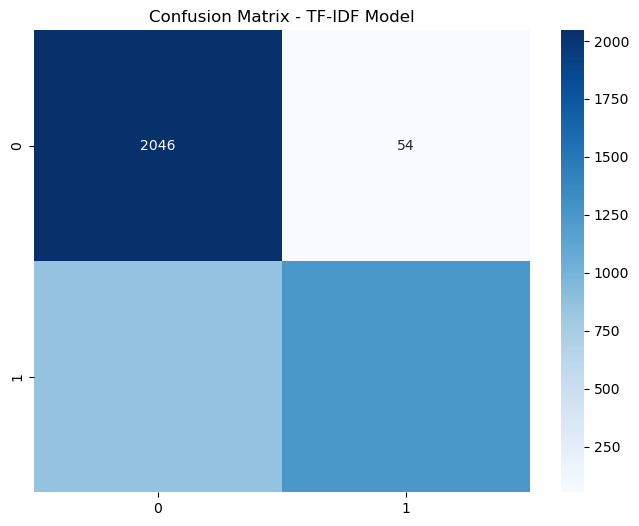

In [ ]:
predictions_extra = model.predict(X_extra_val_tfidf)
print(accuracy_score(extra_val_labels, predictions_extra))
# print classification report
print(classification_report(extra_val_labels, predictions_extra))
# print confusion matrix
cm = confusion_matrix(extra_val_labels, predictions_extra)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - TF-IDF Model')
print(cm)